This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [1]:
#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

/Users/aloksingh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#reading the file
data = pd.read_csv("kc_house_data.csv")

In [3]:
data.shape

(21613, 21)

In [4]:
#Display top 5 rows
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#Data tyes of all columns
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
#Statistical Summary of DataFrame
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Our data set consist of 21613 rows and 19 columns

# Data Cleaning

In [7]:
data["id"].value_counts()

795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64

In [9]:
#Dropping Unecessary Columns
data.drop(['id','date'], axis = 1, inplace =True)

drop id columns and date because id is unique for each row and date also and it's also not affected the target variable

In [10]:
#Null Values in our df
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
#Looking for duplicated values
data.duplicated().sum()

5

we have 5 duplicated values .

In [17]:
# dropping Duplicated values
data.drop_duplicates()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Exploratory Data Analysis


In [19]:
# Count of ecah floor
flrs = data.floors.value_counts().to_frame()
flrs

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [28]:
#Correlation of Features w.r.t. Price column
data.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<Axes: >

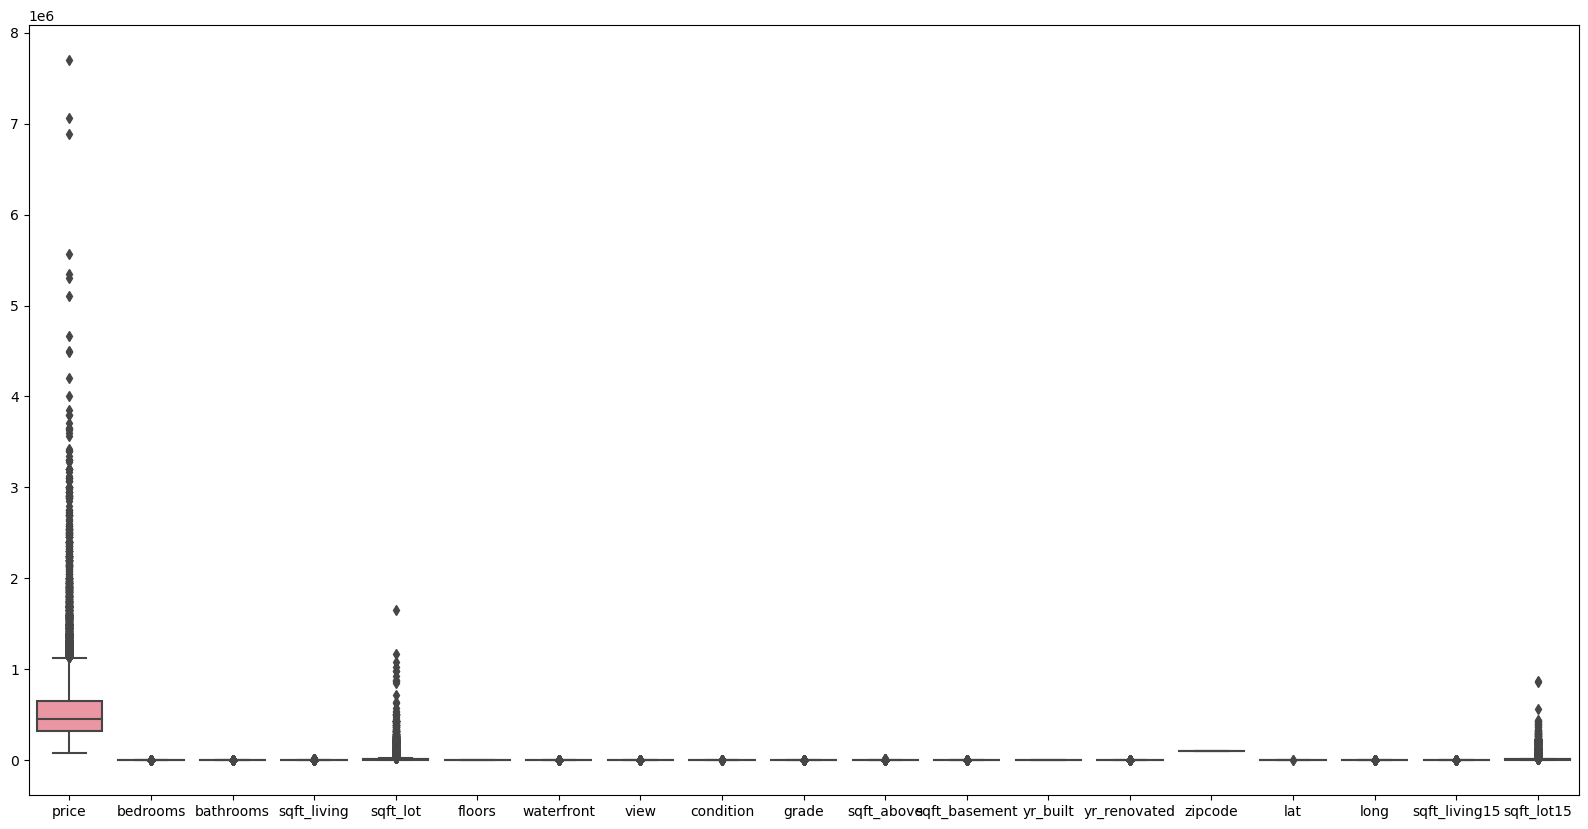

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(data)

<Axes: >

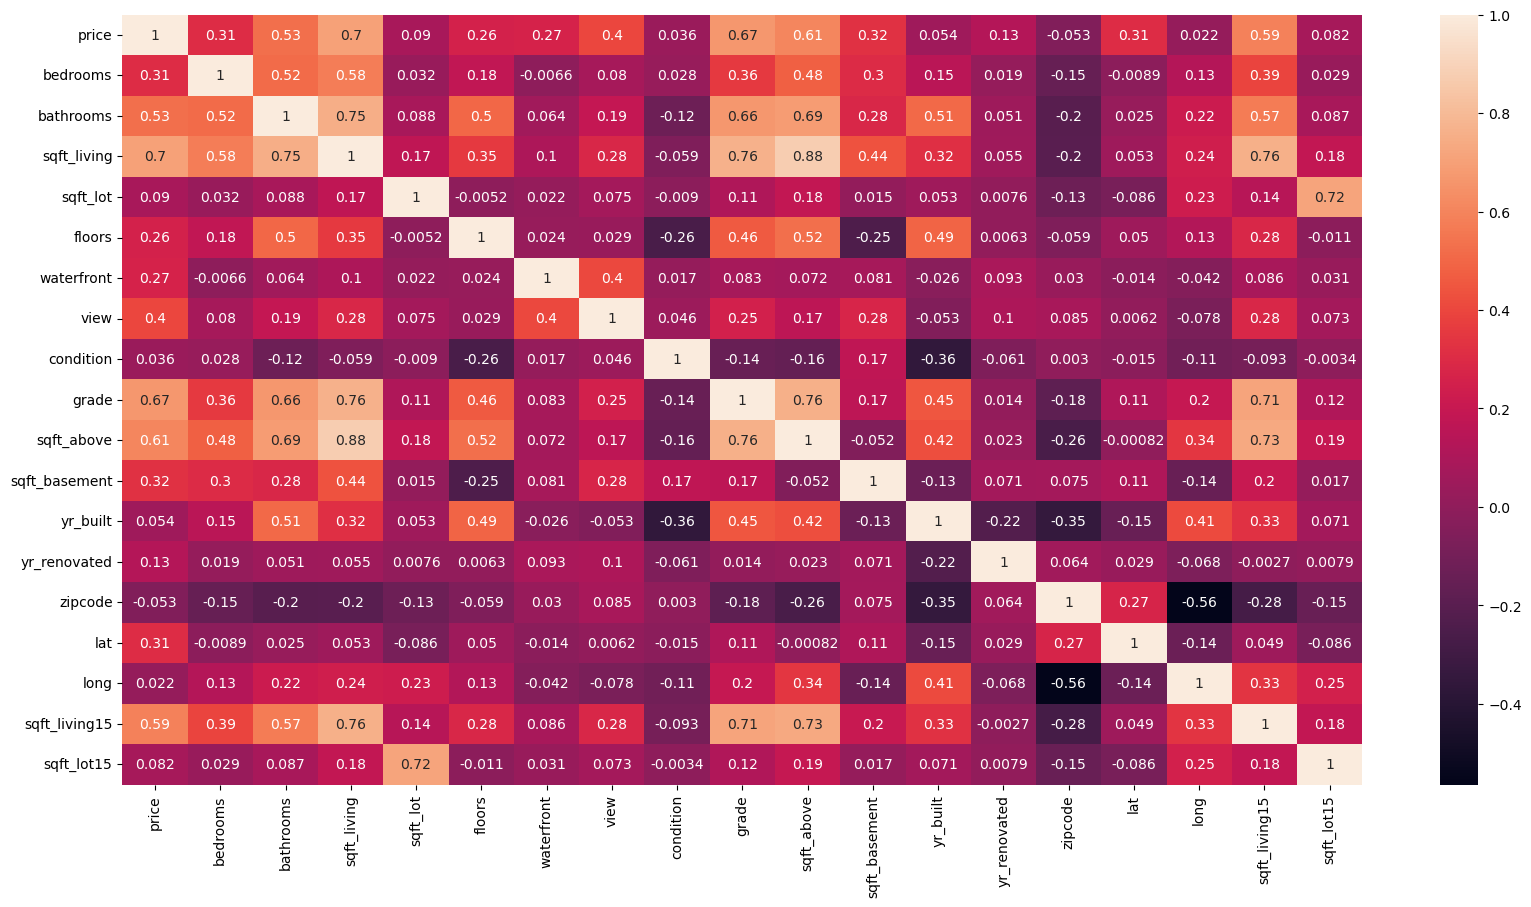

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot = True)

In [35]:
#splitt data into a and b
x = data.drop("price",axis =1)
y = data["price"]

# feature selection

NOW WE ARE USING FEATURE SELECTION FROM DECISION TREE

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [131]:
model=DecisionTreeRegressor(random_state=42)

In [132]:
model.fit(x,y)

DecisionTreeRegressor(random_state=42)

In [133]:
imp_feature=model.feature_importances_

In [134]:
imp_feature

array([0.0017823 , 0.00437942, 0.25330263, 0.02061848, 0.00079971,
       0.0330877 , 0.00784204, 0.00250761, 0.33784725, 0.02832786,
       0.00474696, 0.01696943, 0.0020033 , 0.01234366, 0.16713009,
       0.06420185, 0.02681949, 0.01529023])

In [135]:
feature_importances = pd.DataFrame({'feature':x.columns,'importance':imp_feature})
feature_importances.sort_values("importance",ascending = False)

,feature,importance
8,grade,0.337847
2,sqft_living,0.253303
14,lat,0.167130
15,long,0.064202
5,waterfront,0.033088
9,sqft_above,0.028328
16,sqft_living15,0.026819
3,sqft_lot,0.020618
11,yr_built,0.016969
17,sqft_lot15,0.015290


In [137]:
data1 = data.drop(["floors","view","yr_renovated","condition","sqft_basement","bathrooms","bedrooms"],axis = 1)

In [138]:
data1

,price,sqft_living,sqft_lot,waterfront,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,1180,5650,0,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,2570,7242,0,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,770,10000,0,6,770,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,1960,5000,0,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,1680,8080,0,8,1680,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,1530,1131,0,8,1530,2009,98103,47.6993,-122.346,1530,1509
21609,400000.0,2310,5813,0,8,2310,2014,98146,47.5107,-122.362,1830,7200
21610,402101.0,1020,1350,0,7,1020,2009,98144,47.5944,-122.299,1020,2007
21611,400000.0,1600,2388,0,8,1600,2004,98027,47.5345,-122.069,1410,1287


In [139]:
X= data1.drop("price",axis =1)
Y= data1["price"]

# Model Development


In [140]:
#Splitting the data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [141]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)


LinearRegression()

In [142]:
lm.score(x_train,y_train)

0.6871696886861742

In [143]:
lm.score(x_test,y_test)

0.6666825915134131

In [149]:
#predicting 
new = lm.predict(x_test)
new

#Finding out accuracy of the predicted and actual value
from sklearn.metrics import r2_score
r2_score(y_test,new)


0.6666825915134131

# Decision Tree

In [150]:
dt = DecisionTreeRegressor(criterion="squared_error",max_depth=7,random_state=42)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [151]:
dt.score(x_train,y_train)

0.8357572511590421

In [152]:
dt.score(x_test,y_test)

0.7893789231885446

In [153]:
#predicting 
new1 = dt.predict(x_test)
new1

#Finding out accuracy of the predicted and actual value
from sklearn.metrics import r2_score
r2_score(y_test,new1)


0.7893789231885446

-> Accuracy is around 78 percentage which is pretty good as compare to linear regression

In [154]:
# using variable to store DecisionTreeRegression and standardiation technique for pipeline
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',DecisionTreeRegressor(criterion="squared_error",max_depth=7,random_state=42))]

In [155]:
#creating a pipeline for predicting the price 
from sklearn.pipeline import Pipeline
pipe = Pipeline(Input)
pipe.fit(x_train,y_train)

#Accuracy of tye model after fitting
pipe.score(x_train,y_train)

0.8556429138425419

In [156]:
pipe.score(x_test,y_test)

0.7771658558814185

As we can see that our accuracy is above 83% , now our model is ready for prediction

In [157]:
#Predicting Price
y_pred = pipe.predict(x_test)

In [158]:
# Creating New dataframe of actual , predicted and difference of value between them
new_df = pd.DataFrame({"Actual Value" : y_test , "Predicted Value" : y_pred , 
                       "Difference" : y_test - y_pred})

In [159]:
new_df

,Actual Value,Predicted Value,Difference
17384,297000.0,3.864294e+05,-89429.424581
722,1578000.0,1.440707e+06,137292.891304
2680,562100.0,4.814531e+05,80646.901379
18754,631500.0,4.814531e+05,150046.901379
14554,780000.0,9.777531e+05,-197753.056180
...,...,...,...
18588,1100000.0,7.282232e+05,371776.785714
6784,700000.0,6.212279e+05,78772.114917
14510,380000.0,3.381638e+05,41836.158416
18917,268000.0,2.554646e+05,12535.373602


<Axes: xlabel='price'>

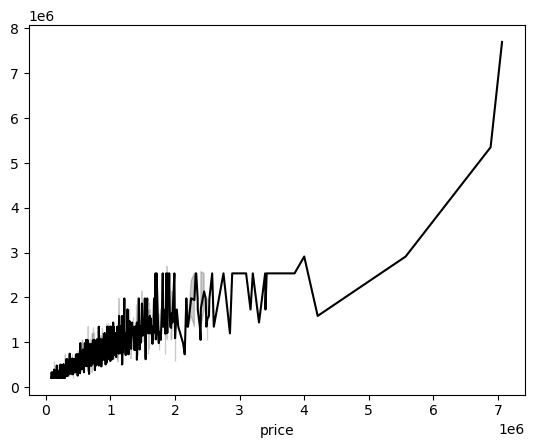

In [160]:
sns.lineplot(x = y_test , y = y_pred ,color ='black') 

As we can see clearly from line plot that our predicted value and the catual value are mostly same.

<Axes: xlabel='price'>

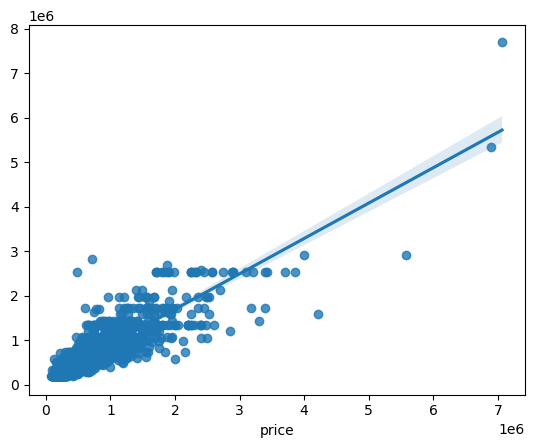

In [161]:
# Regression plot of actual and predicted value.
sns.regplot(x = y_test , y = y_pred )